# FraudSpotter: detecção inteligente com análise de custos

## 💡 Introdução

Neste projeto, foi desenvolvida uma solução de aprendizado de máquina para **detecção de fraudes em transações financeiras**. O conjunto de dados utilizado apresenta um forte desbalanceamento entre as classes, o que representa um desafio comum nesse tipo de problema. Para lidar com isso, foram aplicadas diferentes estratégias de balanceamento e avaliados múltiplos modelos de classificação, com o objetivo de maximizar a detecção de fraudes sem comprometer excessivamente a taxa de falsos positivos. Além das métricas tradicionais, também foi realizada uma análise de custo para refletir o impacto financeiro das decisões dos modelos.


## 🎯 Objetivo

O principal objetivo deste projeto é construir, avaliar e comparar modelos de machine learning para **identificar transações financeiras fraudulentas**, mesmo diante de um cenário altamente desbalanceado. A proposta inclui a aplicação de diferentes técnicas de balanceamento dos dados, o ajuste de modelos de classificação e a análise de suas performances por meio de métricas como precision, recall, F1-score, AUC-ROC e AUC-PR. Além disso, busca-se incorporar uma perspectiva de negócio ao projeto, mensurando os **custos financeiros associados aos erros de classificação** (falsos positivos e falsos negativos), a fim de identificar a solução mais eficiente não apenas do ponto de vista técnico, mas também econômico.


## 📦 Dataset

Utilizaremos o conjunto de dados "Credit Card Fraud Detection Dataset" disponível [Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)​.

# Etapa 1 - Análise exploratória dos dados (EDA)

Inicialmente iremos carregar as bibliotecas necessárias para carregar, analisar e visualizar os dados.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.1 Visualização inicial dos dados

In [6]:
# Carregando os dados
df = pd.read_csv('creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# Visualização inicial dos dados
print(f'O dataset é composto por {df.shape[0]} linhas e {df.shape[1]} colunas.')
print('\n','#'*30)
print('\nTipos de dados:')
print(df.dtypes.value_counts())
print('\n','#'*30)
# Verificando valores ausentes
print('\nValores ausentes:')
print(df.isnull().sum().sum())

O dataset é composto por 284807 linhas e 31 colunas.

 ##############################

Tipos de dados:
float64    30
int64       1
Name: count, dtype: int64

 ##############################

Valores ausentes:
0


## 1.2 Entendendo a distribuição das classes a variável alvo

In [8]:
# Verificando a distribuição das classes
print('Distribuição da variável alvo:')
print(df['Class'].value_counts(normalize=True))

Distribuição da variável alvo:
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


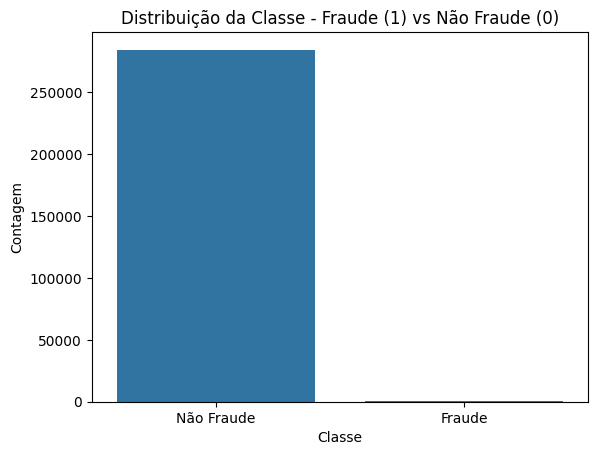

In [9]:
sns.countplot(x='Class', data=df)
plt.title('Distribuição da Classe - Fraude (1) vs Não Fraude (0)')
plt.xticks([0, 1], ['Não Fraude', 'Fraude'])
plt.ylabel('Contagem')
plt.xlabel('Classe')
plt.show()

### Análise do balanceamento da variável alvo

Durante a etapa de Análise Exploratória dos Dados (EDA), foi identificado um forte desbalanceamento na variável alvo `Class`, que indica se uma transação foi fraudulenta (`1`) ou não (`0`). A maioria dos registros representa transações legítimas (`Class = 0`), enquanto as transações fraudulentas (`Class = 1`) são raras — uma característica típica em bases de dados reais de detecção de fraudes.

> 📌 **Exemplo:**  
> Vimos que 99,83% das transações na base foram legítimas e apenas 0,17% foram fraudes.  
> Um modelo que simplesmente classifique **todas** as transações como "legítimas" (ou seja, nunca detecte fraudes) apresentaria uma **acurácia de 99,83%**, mas na prática seria inútil, pois **não identificaria nenhuma fraude**.  
> Isso demonstra que a acurácia, sozinha, **não é uma métrica confiável** em problemas com dados desbalanceados.

Além disso, o desbalanceamento na variável alvo pode afetar significativamente o desempenho dos algoritmos de machine learning. Quando a maioria dos dados pertence a uma única classe, o modelo tende a **"aprender" a prever apenas essa classe majoritária**, ignorando a classe minoritária — que, nesse caso, representa justamente as transações fraudulentas.

Por isso, é essencial aplicar estratégias de balanceamento e utilizar **métricas alternativas** que considerem esse cenário, como **Precision, Recall, AUC-ROC e AUC-PR**, que ajudam a avaliar o desempenho real do modelo na detecção de fraudes.



## 1.3 Analisando a correlação das variáveis explicativas com a variável alvo

In [10]:
# Correlação das variáveis com a variável alvo
correlacoes = df.corr()['Class'].drop('Class').sort_values(key=abs, ascending=False)
top_10_corr = correlacoes.head(10)
print('10 features com maiores valores de correlação com a variável Class:')
print(top_10_corr)

10 features com maiores valores de correlação com a variável Class:
V17   -0.326481
V14   -0.302544
V12   -0.260593
V10   -0.216883
V16   -0.196539
V3    -0.192961
V7    -0.187257
V11    0.154876
V4     0.133447
V18   -0.111485
Name: Class, dtype: float64


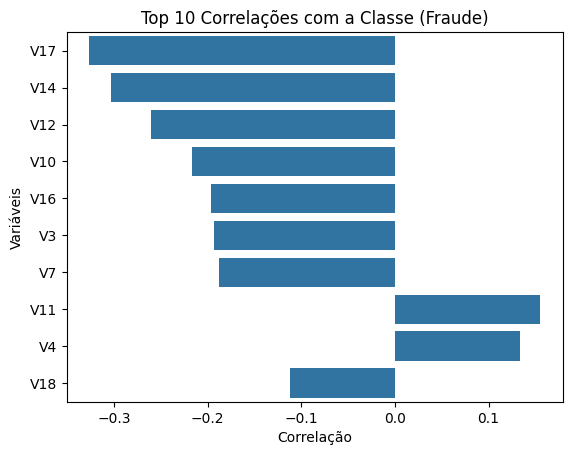

In [11]:
sns.barplot(x=top_10_corr.values, y=top_10_corr.index)
plt.title('Top 10 Correlações com a Classe (Fraude)')
plt.ylabel('Variáveis')
plt.xlabel('Correlação')
plt.show()

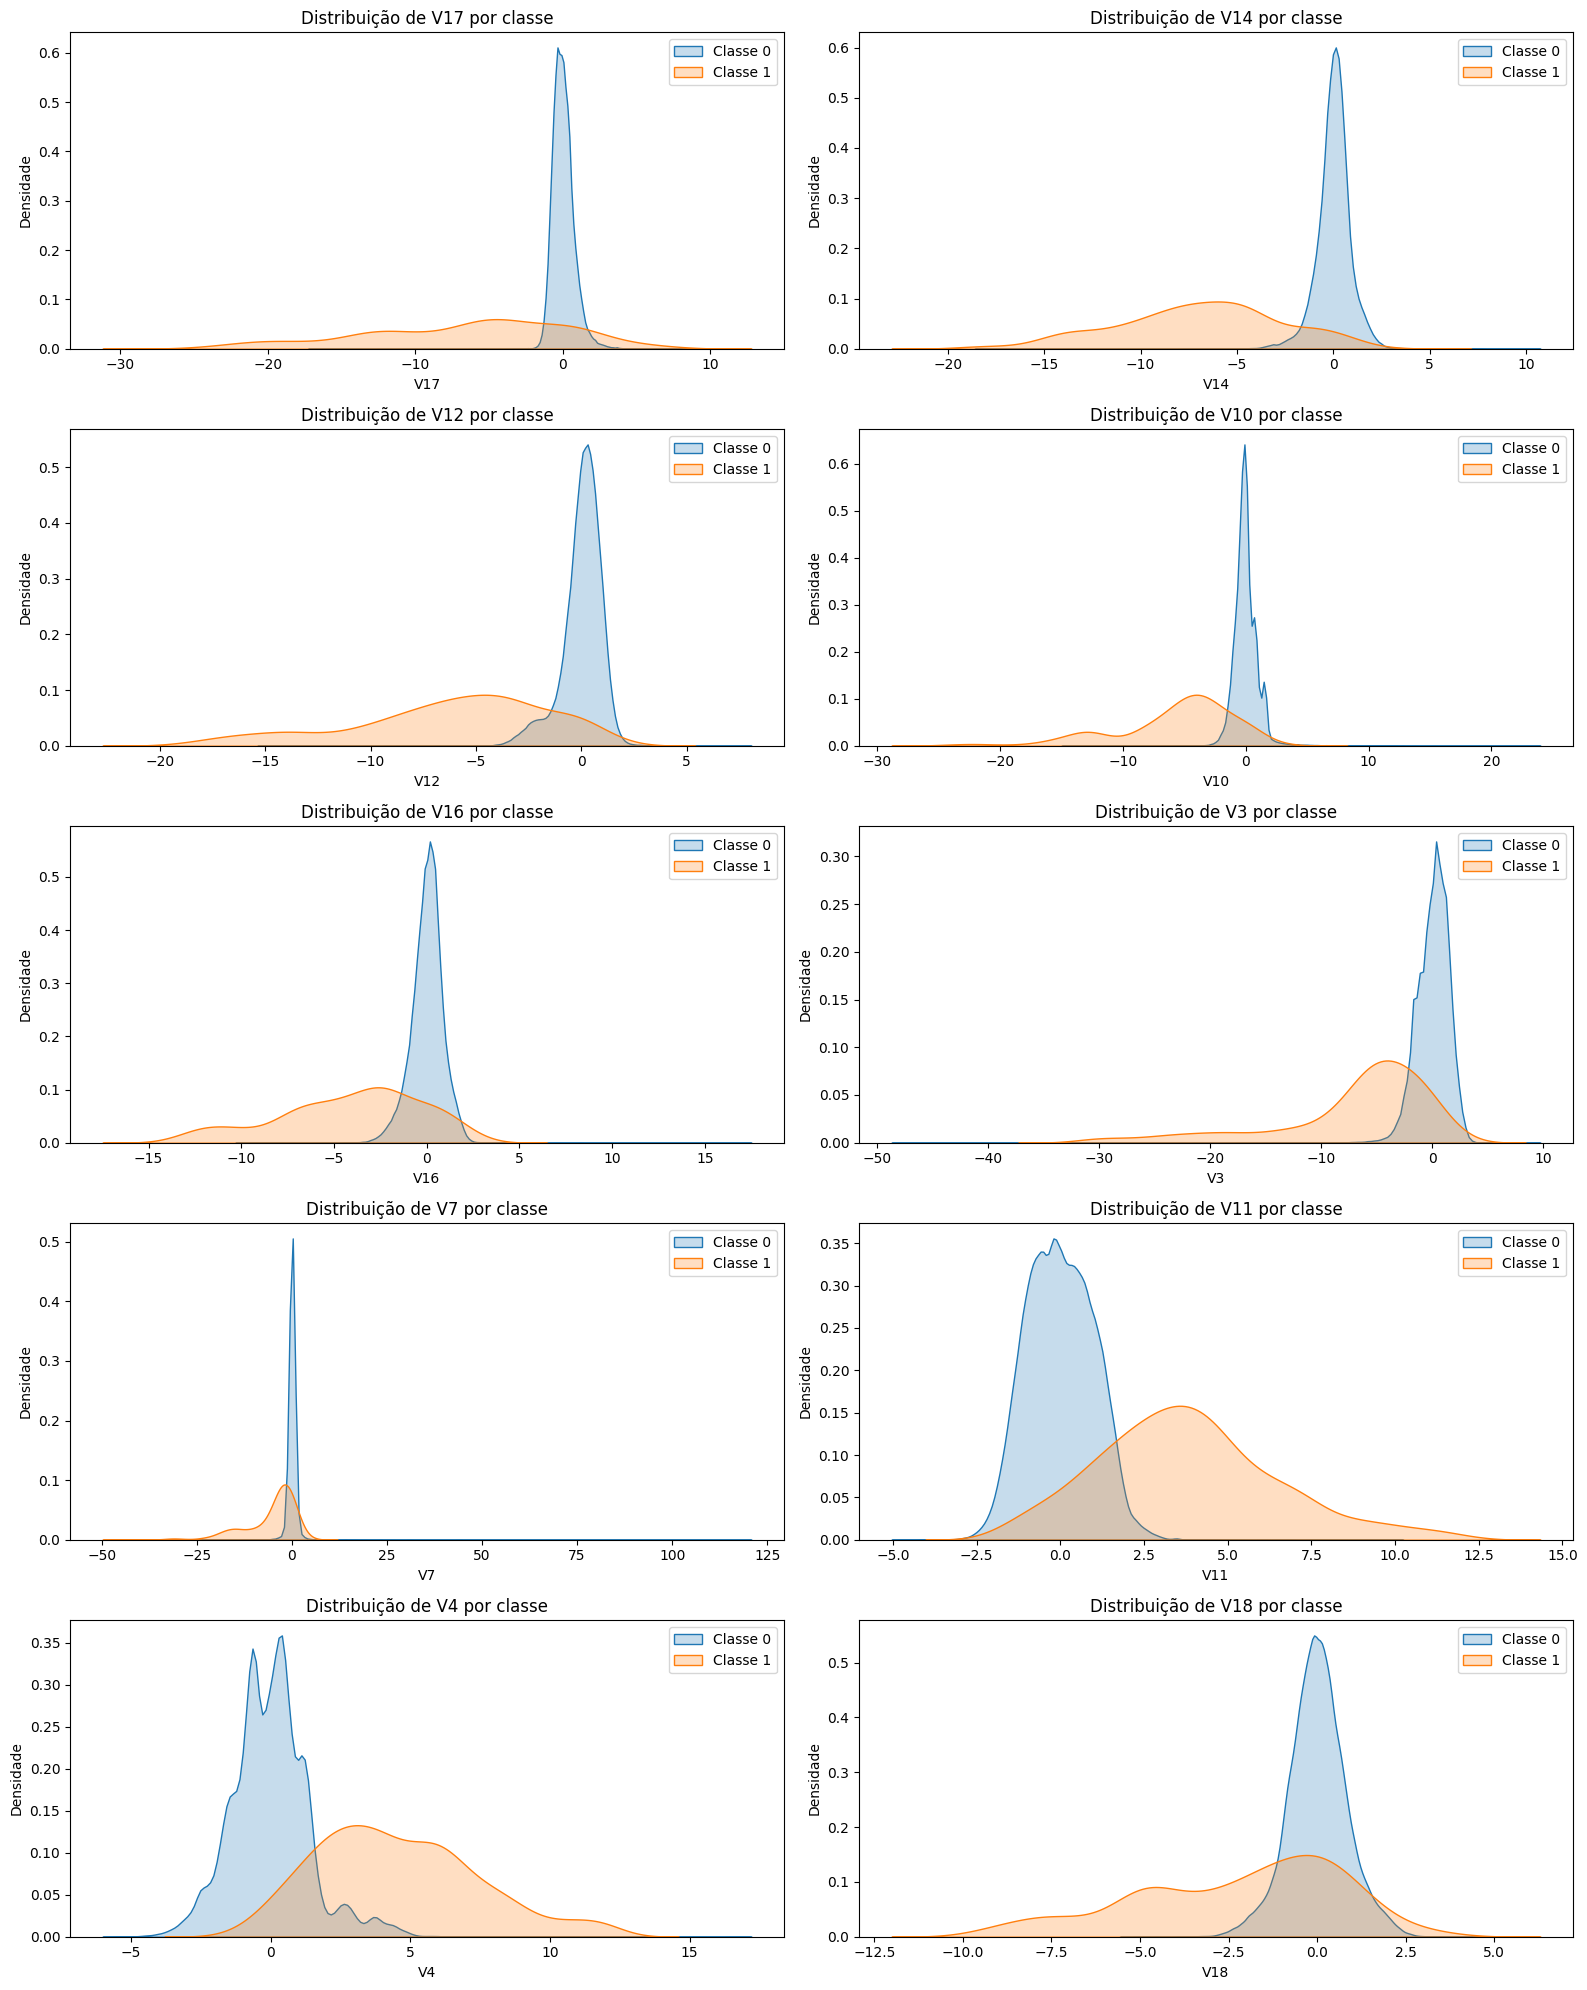

In [12]:
#Criando gráficos de densidade (KDE) para cada variável
plt.figure(figsize=(16, 20))

for i, col in enumerate(top_10_corr.index.to_list()):
    plt.subplot(5, 2, i + 1)
    sns.kdeplot(data=df[df['Class'] == 0], x=col, label='Classe 0', fill=True)
    sns.kdeplot(data=df[df['Class'] == 1], x=col, label='Classe 1', fill=True)
    plt.title(f'Distribuição de {col} por classe')
    plt.xlabel(col)
    plt.ylabel('Densidade')
    plt.legend()

plt.tight_layout()
plt.show()

### Distribuição das variáveis mais correlacionadas com `Class`

O gráfico acima mostra a distribuição das 10 variáveis com maior correlação com a variável alvo `Class`, separadas por classe (0 = transações legítimas, 1 = fraudes).

Podemos observar que, em praticamente todas as variáveis exibidas, há **diferenças significativas entre as distribuições das classes**, indicando que essas variáveis têm bom potencial discriminativo para separar transações fraudulentas das legítimas. 

Destaques:

- Variáveis como `V12`, `V14`, `V10`, `V16` e `V17` apresentam **valores mais extremos para a classe 1**, enquanto a classe 0 tem distribuições mais concentradas próximas a zero.
- Em algumas variáveis (como `V4`, `V11` e `V3`), há sobreposição entre as distribuições das classes, mas ainda assim existem diferenças relevantes.
- Esse comportamento evidencia que **os modelos de classificação podem se beneficiar dessas variáveis para identificar padrões associados à fraude**.

Esse tipo de visualização é importante para entender a **separabilidade das classes no espaço das variáveis**.

# Etapa 2 - Preprocessamento e estratégias para lidar com o desbalanceamento

## 2.1 - Divisão da base de dados em conjunto de treino e teste

Inicialmente iremos dividir o conjunto de dados nos subconjuntos X (variáveis explicativas) e y(variável alvo). Em seguida iremos dividir esses dados nos conjuntos de treino e validação com a função `train_test_split` do módulo `model_selection` da biblioteca `Scikit-learn`. 

In [13]:
#Dividindo os dados nos subconjuntos X e y

X = df.drop('Class', axis=1)
y = df['Class']

In [14]:
#importando a biblioteca
from sklearn.model_selection import train_test_split

In [15]:
#Aqui faremos a divisão dos conjuntos de treino e teste
#Como trabalhamos com dados desbalanceados, é fundamental usar o parâmetro stratify=y para manter as proporções da variável alvo nos subconjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.7,random_state=9999)

In [16]:
# Verificando a distribuição da variável 'Class' nos conjuntos de treino e validação
print("\nDistribuição da variável alvo (Class) no conjunto de treino:")
print(y_train.value_counts(normalize=True))

print("\nDistribuição da variável alvo (Class) no conjunto de teste:")
print(y_train.value_counts(normalize=True))


Distribuição da variável alvo (Class) no conjunto de treino:
Class
0    0.998275
1    0.001725
Name: proportion, dtype: float64

Distribuição da variável alvo (Class) no conjunto de teste:
Class
0    0.998275
1    0.001725
Name: proportion, dtype: float64


Podemos confirmar que as porcentagens permaneceram idênticas às do conjunto de dados original

## 2.2 Estratégias para lidar com o desbalanceamento

Para lidar com o desbalanceamento da variável alvo, iremos testar três abordagens diferentes usando o modelo XGBoost, com o objetivo de comparar o impacto de cada técnica:

1. **Dados originais (desbalanceados):**  
   Será ajustado um modelo com os dados no formato original, sem nenhum tipo de balanceamento. Essa versão servirá como **baseline** para comparação.

2. **Ajuste com `scale_pos_weight`:**  
   O parâmetro `scale_pos_weight` será utilizado para atribuir um peso maior à classe minoritária (fraudes) durante o treinamento, compensando o desbalanceamento **sem alterar os dados**.

3. **Oversampling com SMOTE:**  
   A técnica **SMOTE (Synthetic Minority Over-sampling Technique)** será utilizada para gerar novas amostras sintéticas da classe minoritária, criando um conjunto de treino mais equilibrado.

---

Essa abordagem permitirá avaliar o desempenho do modelo em diferentes cenários e escolher a estratégia que apresentar os melhores resultados.

Iniciaremos importando as bibliotecas para aplicar o SMOTE. É importante ressaltar que aplicaremos o SMOTE apenas no conjunto de treino, devendo o conjunto de teste permanecer com o balanceamento igual aos dados originais.

In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
#Aplicar o SMOTE no conjunto de treino
smote = SMOTE(random_state=9999)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [19]:
#Verificando as proporções da variável 'Class' no conjunto de treino
y_train_sm.value_counts(normalize=True)

Class
0    0.5
1    0.5
Name: proportion, dtype: float64

# Etapa 3 - Ajuste dos modelos e extração de métricas

Importando as bibliotecas necessárias

In [20]:
import xgboost as xgb
from sklearn.metrics import classification_report, precision_recall_curve, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay

## 3.1 Modelagem com dados originais (baseline)

In [21]:
#Treinando o modelo com os dados originais (desbalanceados)
modelo_baseline = xgb.XGBClassifier(objective='binary:logistic')

modelo_baseline.fit(X_train, y_train)

pred_baseline = modelo_baseline.predict(X_test)

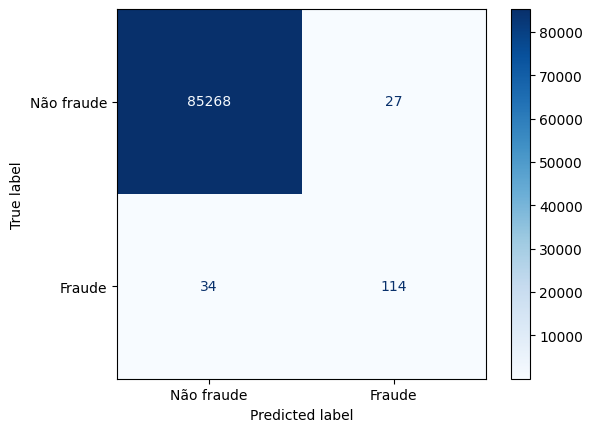

In [22]:
ConfusionMatrixDisplay.from_estimator(modelo_baseline, X_test, y_test, display_labels=['Não fraude', 'Fraude'],
                                      cmap='Blues');

In [23]:
report_baseline = classification_report(y_test, pred_baseline, digits=4)
print(report_baseline)

              precision    recall  f1-score   support

           0     0.9996    0.9997    0.9996     85295
           1     0.8085    0.7703    0.7889       148

    accuracy                         0.9993     85443
   macro avg     0.9041    0.8850    0.8943     85443
weighted avg     0.9993    0.9993    0.9993     85443



In [24]:
# Gerar as probabilidades para a classe positiva
prob_baseline = modelo_baseline.predict_proba(X_test)[:,1]

# Gerar métricas para a curva ROC
fpr_baseline, tpr_baseline, _ = roc_curve(y_test, prob_baseline)
auc_roc_baseline = auc(fpr_baseline, tpr_baseline)

# Gerar métricas para a curva Precision-Recall
precision_baseline, recall_baseline, _ = precision_recall_curve(y_test, prob_baseline)
auc_pr_baseline = auc(recall_baseline, precision_baseline)

print('*' * 100)
print(f'Área sob a Curva ROC (AUC-ROC) do modelo baseline = {auc_roc_baseline:.4f}')
print(f'Área sob a Curva Precision-Recall (AUC-PR) do modelo baseline = {auc_pr_baseline:.4f}')
print('*' * 100)

****************************************************************************************************
Área sob a Curva ROC (AUC-ROC) do modelo baseline = 0.9115
Área sob a Curva Precision-Recall (AUC-PR) do modelo baseline = 0.7822
****************************************************************************************************


## 3.2 Modelagem com o parâmetro scale_pos_weight

In [25]:
# Calculando o valor do parâmetro scale_pos_weight
n_negativos = y_train.value_counts()[0]
n_positivos = y_train.value_counts()[1]
scale_pos_weight = (n_negativos / n_positivos)
scale_pos_weight

np.float64(578.546511627907)

In [26]:
#Treinando o modelo com o parâmetro 'scale_pos_weight'
modelo_spw = xgb.XGBClassifier(objective='binary:logistic', scale_pos_weight = scale_pos_weight)

modelo_spw.fit(X_train, y_train)

pred_spw = modelo_spw.predict(X_test)

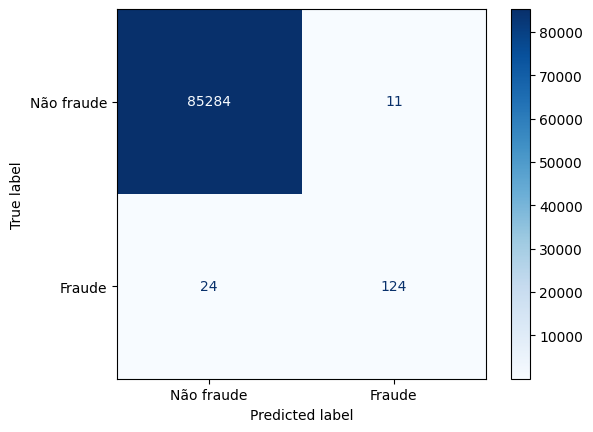

In [27]:
ConfusionMatrixDisplay.from_estimator(modelo_spw, X_test, y_test, display_labels=['Não fraude', 'Fraude'],
                                      cmap='Blues');

In [28]:
report_spw = classification_report(y_test, pred_spw, digits=4)
print(report_spw)

              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     85295
           1     0.9185    0.8378    0.8763       148

    accuracy                         0.9996     85443
   macro avg     0.9591    0.9189    0.9381     85443
weighted avg     0.9996    0.9996    0.9996     85443



In [29]:
# Gerar as probabilidades para a classe positiva
prob_spw = modelo_spw.predict_proba(X_test)[:,1]

# Gerar métricas para a curva ROC
fpr_spw, tpr_spw, _ = roc_curve(y_test, prob_spw)
auc_roc_spw = auc(fpr_spw, tpr_spw)

# Gerar métricas para a curva Precision-Recall
precision_spw, recall_spw, _ = precision_recall_curve(y_test, prob_spw)
auc_pr_spw = auc(recall_spw, precision_spw)

print('*' * 100)
print(f'Área sob a Curva ROC (AUC-ROC) do modelo com scale_pos_weight = {auc_roc_spw:.4f}')
print(f'Área sob a Curva Precision-Recall (AUC-PR) do modelo com scale_pos_weight = {auc_pr_spw:.4f}')
print('*' * 100)

****************************************************************************************************
Área sob a Curva ROC (AUC-ROC) do modelo com scale_pos_weight = 0.9843
Área sob a Curva Precision-Recall (AUC-PR) do modelo com scale_pos_weight = 0.8635
****************************************************************************************************


## 3.3 Modelagem com SMOTE

In [30]:
#Treinando o modelo com SMOTE
modelo_SMOTE = xgb.XGBClassifier(objective='binary:logistic')

modelo_SMOTE.fit(X_train_sm, y_train_sm)

pred_SMOTE = modelo_SMOTE.predict(X_test)

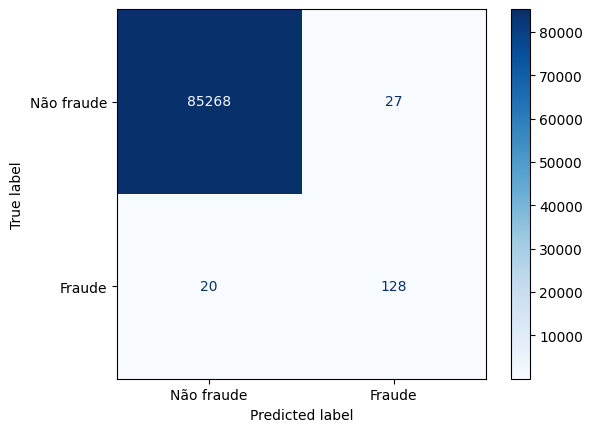

In [31]:
ConfusionMatrixDisplay.from_estimator(modelo_SMOTE, X_test, y_test, display_labels=['Não fraude', 'Fraude'],
                                      cmap='Blues');

In [32]:
report_smote = classification_report(y_test, pred_SMOTE, digits=4)
print(report_smote)

              precision    recall  f1-score   support

           0     0.9998    0.9997    0.9997     85295
           1     0.8258    0.8649    0.8449       148

    accuracy                         0.9994     85443
   macro avg     0.9128    0.9323    0.9223     85443
weighted avg     0.9995    0.9994    0.9995     85443



In [33]:
# Gerar as probabilidades para a classe positiva
prob_SMOTE = modelo_SMOTE.predict_proba(X_test)[:,1]

# Gerar métricas para a curva ROC
fpr_SMOTE, tpr_SMOTE, _ = roc_curve(y_test, prob_SMOTE)
auc_roc_SMOTE = auc(fpr_SMOTE, tpr_SMOTE)

# Gerar métricas para a curva Precision-Recall
precision_SMOTE, recall_SMOTE, _ = precision_recall_curve(y_test, prob_SMOTE)
auc_pr_SMOTE = auc(recall_SMOTE, precision_SMOTE)

print('*' * 100)
print(f'Área sob a Curva ROC (AUC-ROC) do modelo com SMOTE = {auc_roc_SMOTE:.4f}')
print(f'Área sob a Curva Precision-Recall (AUC-PR) do modelo com SMOTE = {auc_pr_SMOTE:.4f}')
print('*' * 100)

****************************************************************************************************
Área sob a Curva ROC (AUC-ROC) do modelo com SMOTE = 0.9846
Área sob a Curva Precision-Recall (AUC-PR) do modelo com SMOTE = 0.8723
****************************************************************************************************


## 3.4 Comparação gráfica do desempenho dos modelos

Nesta parte, você pode apresentar:

- **Curvas ROC (Receiver Operating Characteristic)**

    Mostra a relação entre taxa de verdadeiros positivos (TPR) e falsos positivos (FPR)

    Métrica associada: AUC-ROC

- **Curvas Precision-Recall**

    Especialmente útil para bases desbalanceadas

    Métrica associada: AUC-PR

Esses gráficos complementam as métricas numéricas e ajudam a visualizar o comportamento dos modelos ao longo de diferentes thresholds.

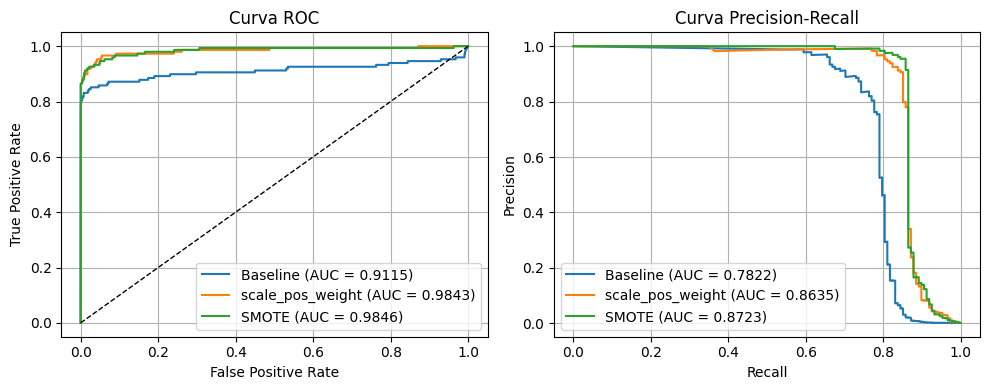

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Curva ROC
ax[0].plot(fpr_baseline, tpr_baseline, label=f'Baseline (AUC = {auc_roc_baseline:.4f})')
ax[0].plot(fpr_spw, tpr_spw, label=f'scale_pos_weight (AUC = {auc_roc_spw:.4f})')
ax[0].plot(fpr_SMOTE, tpr_SMOTE, label=f'SMOTE (AUC = {auc_roc_SMOTE:.4f})')
ax[0].plot([0, 1], [0, 1], 'k--', lw=1)
ax[0].set_title('Curva ROC')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].legend(loc='lower right')
ax[0].grid(True)

# Curva Precision-Recall
ax[1].plot(recall_baseline, precision_baseline, label=f'Baseline (AUC = {auc_pr_baseline:.4f})')
ax[1].plot(recall_spw, precision_spw, label=f'scale_pos_weight (AUC = {auc_pr_spw:.4f})')
ax[1].plot(recall_SMOTE, precision_SMOTE, label=f'SMOTE (AUC = {auc_pr_SMOTE:.4f})')
ax[1].set_title('Curva Precision-Recall')
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
ax[1].legend(loc='lower left')
ax[1].grid(True)

plt.tight_layout()
plt.show()

# Etapa 4 - Interpretação dos resultados

## 4.1 Análise das métricas extraídas dos modelos

A tabela abaixo resume as principais métricas de desempenho dos três modelos testados, considerando as diferentes técnicas para lidar com o desbalanceamento da base de dados:

| Técnica           | Precision | Recall  | F1-Score  | AUC-ROC  | AUC-PR  |
|-------------------|-----------|---------|-----------|----------|---------|
| Baseline          | 0.8085    | 0.7703  | 0.7889    | 0.9115   | 0.7822  |
| scale_pos_weight  | 0.9185    | 0.8378  | 0.8763    | 0.9843   | 0.8635  |
| SMOTE             | 0.8258    | 0.8649  | 0.8449    | 0.9846   | 0.8723  |

Os resultados obtidos com as diferentes abordagens demonstram claramente a influência do tratamento do balanceamento no desempenho dos modelos de classificação. A seguir, discutimos brevemente os principais pontos observados:

- O modelo **Baseline**, sem nenhum tratamento do desbalanceamento, apresentou desempenho modesto. Embora o AUC-ROC seja relativamente alto (0.9115), o AUC-PR de 0.7889 indica maior dificuldade em identificar corretamente as fraudes, o que é comum em bases desbalanceadas.
  
- O modelo com **scale_pos_weight** apresentou melhora significativa em todas as métricas. Ele se destaca pelo maior F1-score (0.8763), que representa o melhor equilíbrio entre precisão e recall. Esse modelo também possui um bom valor de AUC-ROC (0.9843) e um bom AUC-PR (0.8635), o que reforça sua robustez.
  
- O modelo com **SMOTE** apresentou o maior Recall (0.8649) e o maior AUC-PR (0.8723), o que é interessante para o caso de uso — já que identificar o maior número possível de fraudes é prioritário. No entanto, seu F1-score foi um pouco inferior ao modelo com scale_pos_weight, indicando que ele pode estar cometendo mais falsos positivos.

De forma geral, as técnicas de balanceamento **melhoraram significativamente o desempenho na identificação de fraudes**. O modelo com **scale_pos_weight** teve o melhor desempenho geral, sendo o mais equilibrado entre precisão e recall. Entretanto, em cenários onde o custo de não detectar uma fraude é alto, como é o caso deste projeto, o modelo com aplicação do **SMOTE** pode ser preferido, pois permitiu minimizar falsos negativos, mesmo que isso gere mais alarmes falsos (falsos positivos).

## 4.2 Análise das Curvas ROC e Precision-Recall

As curvas ROC e Precision-Recall apresentadas anteriormente permitem uma avaliação mais detalhada do desempenho dos modelos na tarefa de detecção de fraudes.

- **Curva ROC**: Ambos os modelos com técnicas para tratar o desbalanceamento (`scale_pos_weight` e `SMOTE`) superam visivelmente o modelo **Baseline**, com **valores de AUC superiores a 0.98**, indicando excelente capacidade de separação entre as classes. O modelo baseline, por outro lado, apresenta AUC de **0.9115**, o que ainda é bom, mas inferior aos demais.

- **Curva Precision-Recall**: Essa curva é particularmente útil em cenários de classes desbalanceadas, como é o caso. Novamente, os modelos com `scale_pos_weight` (**AUC = 0.8635**) e **SMOTE** (**AUC = 0.8723**) se destacam, apresentando melhor desempenho em termos de **precisão em altos níveis de recall**. O modelo baseline apresenta AUC de **0.7822**, evidenciando menor precisão principalmente em cenários onde o recall é elevado.

Esses gráficos reforçam os resultados observados nas métricas, evidenciando que os modelos ajustados para lidar com o desbalanceamento são mais eficazes na detecção de fraudes em termos de desempenho estatístico.


## 4.3 - Comparação entre correlação e importância das variáveis

Nesta etapa iremos extrair as 10 variáveis que tiveram maior importância no modelo_SMOTE e iremos comparar com as 10 variáveis com maior correlação com a nossa variável alvo (Class), que já foram apresentadas na **Etapa 1**.
    
A importância das variáveis será medida pelo tipo `gain` que indica o quanto cada feature contribui para a melhoria do critério de divisão nas árvores do modelo, ou seja, quanto maior o `gain`, maior o impacto daquela variável na redução do erro e, portanto, na tomada de decisão do modelo.

In [35]:
importancia = modelo_SMOTE.feature_importances_
features = X.columns

# Cria um dataframe com o nome da feature e a importância ordenados de forma decrescente
feature_imp_df = pd.DataFrame({
    'Feature': features,
    'Importancia': importancia
}).sort_values(by='Importancia', ascending=False)

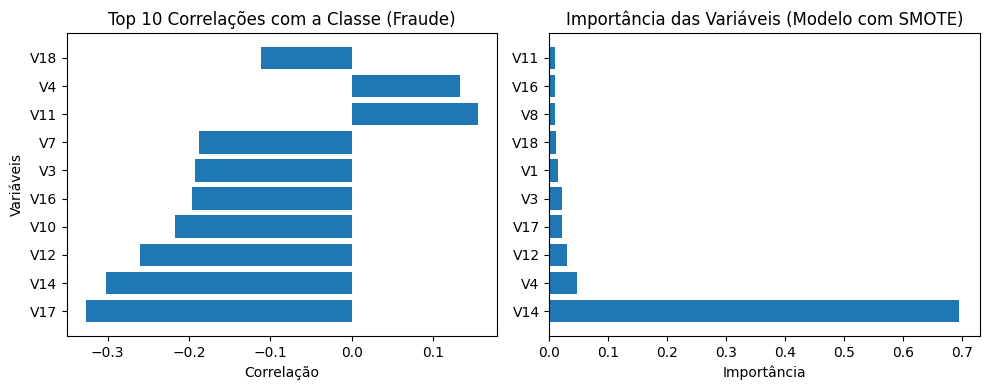

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].barh(top_10_corr.index, top_10_corr.values)
ax[0].set_title('Top 10 Correlações com a Classe (Fraude)')
ax[0].set_ylabel('Variáveis')
ax[0].set_xlabel('Correlação')
# Plotando as top 10 features com maior importância
ax[1].barh(feature_imp_df['Feature'].head(10), feature_imp_df['Importancia'].head(10))
ax[1].set_xlabel('Importância')
ax[1].set_title('Importância das Variáveis (Modelo com SMOTE)')
plt.tight_layout()
plt.show()

Há uma boa sobreposição entre as variáveis com alta correlação e aquelas com alta importância no modelo, especialmente:

`V14, V12, V17, V3, V4, V16, V11`.

Isso sugere que, neste caso, algumas correlações lineares coincidem com a relevância para a detecção de fraude, mas:

Variáveis com baixa ou nenhuma correlação ainda podem ser úteis ao modelo, especialmente quando há efeitos não-lineares ou interações entre variáveis.

Por exemplo, `V1 e V8` não têm alta correlação com Class, mas o XGBoost consegue extrair padrões mais sutis envolvendo essas features.


A análise mostra que correlação com a variável-alvo pode ser um indicativo inicial de relevância, mas não substitui a avaliação empírica feita por modelos de aprendizado de máquina. Modelos como o XGBoost são capazes de identificar relações complexas e interativas entre variáveis, indo além do que a simples correlação linear revela.

# Etapa 5 - Otimização dos hiperparâmetros com GridSearchCV

Após verificarmos que o modelo XGBoost combinado com a técnica SMOTE apresentou o melhor desempenho entre as abordagens testadas, decidimos aplicar o GridSearchCV com o objetivo de otimizar seus hiperparâmetros e refinar ainda mais a performance do modelo.

Mesmo com métricas elevadas, a busca por uma configuração ideal pode contribuir para reduzir possíveis overfits, aumentar a generalização e identificar combinações de parâmetros que potencializem a robustez do modelo.

Para a otimização dos hiperparâmetros do modelo será utilizado o GridSearchCV com validação cruzada estratificada (StratifiedKFold) e métrica de avaliação recall. Essa métrica foi escolhida pois o objetivo é melhorar a capacidade do modelo de detectar transações fraudulentas (classe minoritária).

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [38]:
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=9999)

In [45]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20],
    'learning_rate': [0.1, 0.3, 0.5],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = xgb.XGBClassifier()

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='recall',
    cv=stratified_kfold,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train_sm, y_train_sm)

print('Melhores parâmetros encontrados:', grid_search.best_params_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Melhores parâmetros encontrados: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 150}


In [40]:
modelo_SMOTE_otimizado = xgb.XGBClassifier(colsample_bytree = 0.8, learning_rate = 0.1, max_depth = 10, n_estimators = 150)

modelo_SMOTE_otimizado.fit(X_train_sm, y_train_sm)

pred_final = modelo_SMOTE_otimizado.predict(X_test)

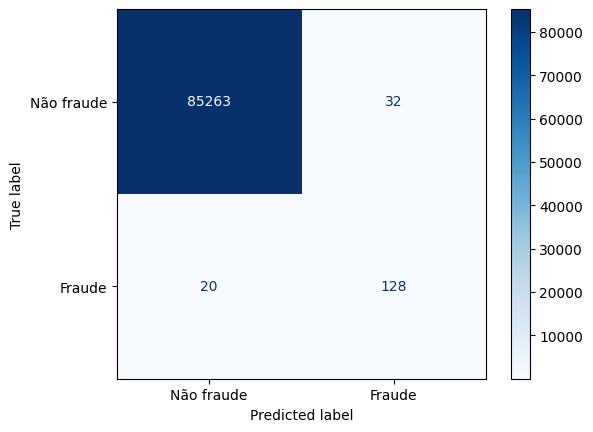

In [41]:
ConfusionMatrixDisplay.from_estimator(modelo_SMOTE_otimizado, X_test, y_test, display_labels=['Não fraude', 'Fraude'],
                                      cmap='Blues');

In [42]:
report = classification_report(y_test, pred_final, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.9998    0.9996    0.9997     85295
           1     0.8000    0.8649    0.8312       148

    accuracy                         0.9994     85443
   macro avg     0.8999    0.9322    0.9154     85443
weighted avg     0.9994    0.9994    0.9994     85443



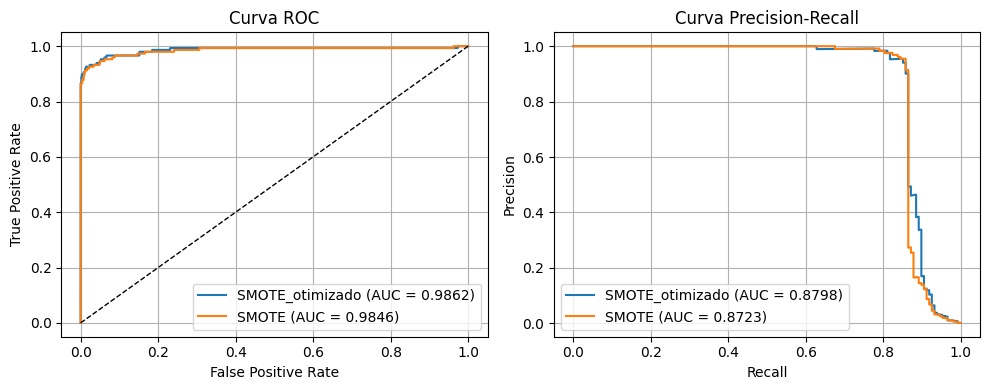

In [43]:
# Gerar as probabilidades para a classe positiva
prob_SMOTE_otimizado = modelo_SMOTE_otimizado.predict_proba(X_test)[:,1]

# Gerar métricas para a curva ROC
fpr_SMOTE_otimizado, tpr_SMOTE_otimizado, _ = roc_curve(y_test, prob_SMOTE_otimizado)
auc_roc_SMOTE_otimizado = auc(fpr_SMOTE_otimizado, tpr_SMOTE_otimizado)

# Gerar métricas para a curva Precision-Recall
precision_SMOTE_otimizado, recall_SMOTE_otimizado, _ = precision_recall_curve(y_test, prob_SMOTE_otimizado)
auc_pr_SMOTE_otimizado = auc(recall_SMOTE_otimizado, precision_SMOTE_otimizado)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Curva ROC
ax[0].plot(fpr_SMOTE_otimizado, tpr_SMOTE_otimizado, label=f'SMOTE_otimizado (AUC = {auc_roc_SMOTE_otimizado:.4f})')
ax[0].plot(fpr_SMOTE, tpr_SMOTE, label=f'SMOTE (AUC = {auc_roc_SMOTE:.4f})')
ax[0].plot([0, 1], [0, 1], 'k--', lw=1)
ax[0].set_title('Curva ROC')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].legend(loc='lower right')
ax[0].grid(True)

# Curva Precision-Recall
ax[1].plot(recall_SMOTE_otimizado, precision_SMOTE_otimizado, label=f'SMOTE_otimizado (AUC = {auc_pr_SMOTE_otimizado:.4f})')
ax[1].plot(recall_SMOTE, precision_SMOTE, label=f'SMOTE (AUC = {auc_pr_SMOTE:.4f})')
ax[1].set_title('Curva Precision-Recall')
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
ax[1].legend(loc='lower left')
ax[1].grid(True)

plt.tight_layout()
plt.show()

Apesar da tentativa, os resultados obtidos após a otimização não apresentaram melhorias significativas quando comparado ao modelo com parâmetros padrão e SMOTE, o que reforça que a técnica de balanceamento teve impacto mais relevante que o ajuste fino de hiperparâmetros.

Por isso, optou-se por manter o modelo com SMOTE e os parâmetros originais como versão final.

## Etapa 6 - Análise dos custos dos erros de classificação

Em problemas de **detecção de fraude**, os erros de classificação não possuem o mesmo impacto. Enquanto um **falso positivo** (transação legítima classificada como fraude) pode gerar um pequeno transtorno ao cliente ou à instituição financeira, um **falso negativo** (fraude classificada como transação legítima) pode representar **prejuízos financeiros significativos**.

Com isso em mente, foi realizada uma análise de custo com as seguintes premissas:

- **Falsos positivos**: custo fixo de **R$ 10,00** por transação;
- **Falsos negativos**: custo proporcional ao **valor financeiro da transação**.

O objetivo é avaliar os modelos não apenas por métricas tradicionais, mas também pelo **impacto financeiro** de seus erros de classificação.

In [44]:
# Cria DataFrames com y_test e valores previstos
df_baseline = X_test.copy()
df_baseline['y_true'] = y_test
df_baseline['y_pred'] = pred_baseline

df_spw = X_test.copy()
df_spw['y_true'] = y_test
df_spw['y_pred'] = pred_spw

df_smote = X_test.copy()
df_smote['y_true'] = y_test
df_smote['y_pred'] = pred_SMOTE

Custo_FP = 10

def custo_total(df):
    fp = df[(df['y_true'] == 0) & (df['y_pred'] == 1)]
    fn = df[(df['y_true'] == 1) & (df['y_pred'] == 0)]
    custo_fp = len(fp) * Custo_FP
    custo_fn = fn['Amount'].sum()
    return custo_fp, custo_fn

custo_baseline_fp, custo_baseline_fn, = custo_total(df_baseline)
custo_spw_fp, custo_spw_fn = custo_total(df_spw)
custo_smote_fp, custo_smote_fn = custo_total(df_smote)

print(f'Custo de falsos positivos do modelo baseline: R$ {custo_baseline_fp:,.2f}')
print(f'Custo de falsos negativos do modelo baseline: R$ {custo_baseline_fn:,.2f}')
print(f'\nCusto total do modelo baseline: R$ {custo_baseline_fp + custo_baseline_fn:,.2f}\n')
print('*' * 100)
print(f'Custo de falsos positivos do modelo com scale_pos_weight: R$ {custo_spw_fp:,.2f}')
print(f'Custo de falsos negativos do modelo scale_pos_weight: R$ {custo_spw_fn:,.2f}')
print(f'\nCusto total do modelo scale_pos_weight: R$ {custo_spw_fp + custo_spw_fn:,.2f}\n')
print('*' * 100)
print(f'Custo de falsos positivos do modelo com SMOTE: R$ {custo_smote_fp:,.2f}')
print(f'Custo de falsos negativos do modelo SMOTE: R$ {custo_smote_fn:,.2f}')
print(f'\nCusto total do modelo SMOTE: R$ {custo_smote_fp + custo_smote_fn:,.2f}\n')

Custo de falsos positivos do modelo baseline: R$ 270.00
Custo de falsos negativos do modelo baseline: R$ 5,696.59

Custo total do modelo baseline: R$ 5,966.59

****************************************************************************************************
Custo de falsos positivos do modelo com scale_pos_weight: R$ 110.00
Custo de falsos negativos do modelo scale_pos_weight: R$ 4,630.32

Custo total do modelo scale_pos_weight: R$ 4,740.32

****************************************************************************************************
Custo de falsos positivos do modelo com SMOTE: R$ 270.00
Custo de falsos negativos do modelo SMOTE: R$ 4,126.16

Custo total do modelo SMOTE: R$ 4,396.16



## 6.1 Discussão dos resultados da análise de custos

| Modelo              | Custo Falsos positivos | Custo Falsos negativos | **Custo Total** |
|---------------------|------------------------|------------------------|-----------------|
| **Baseline**        |       R$ 270,00        |       R$ 5.696,59      | **R$ 5.966,59** |
| **scale_pos_weight**|       R$ 110,00        |       R$ 4.630,32      | **R$ 4.740,32** |
| **SMOTE**           |       R$ 270,00        |       R$ 4.126,16      | **R$ 4.396,16** |

Apesar de o modelo com **SMOTE** apresentar o mesmo número de falsos positivos que o **Baseline**, ele conseguiu **reduzir significativamente o custo dos falsos negativos**, resultando no **menor custo total entre os três modelos**.

O modelo com `scale_pos_weight` teve o **menor número de falsos positivos**, o que também contribuiu para um bom desempenho financeiro, embora com um custo total ligeiramente superior ao SMOTE.

Esses resultados reforçam a importância de ir além das métricas tradicionais e adotar uma **visão orientada a valor**. Considerar os **custos reais dos erros de classificação** permite escolher o modelo com melhor **equilíbrio entre desempenho técnico e impacto econômico**, algo essencial em aplicações críticas como a detecção de fraudes.

# ✅ Conclusões

Este projeto abordou o desafio da detecção de fraudes em transações financeiras, utilizando o dataset "Credit Card Fraud Detection" e o algoritmo XGBoost. O foco principal foi lidar com o desbalanceamento da variável alvo (`Class`), que representa a ocorrência ou não de fraude.

## 🎯 Principais Insights:

1. **Desbalanceamento:** O dataset apresenta um forte desbalanceamento, com a maioria das transações sendo legítimas e uma pequena porcentagem representando fraudes. Isso exige o uso de técnicas específicas para evitar que o modelo simplesmente classifique todas as transações como não fraudulentas.

2. **Técnicas de balanceamento:** Foram testadas três abordagens: uso dos dados originais (baseline), ajuste do parâmetro scale_pos_weight do XGBoost e aplicação da técnica SMOTE (Synthetic Minority Over-sampling Technique).

3. **SMOTE e scale_pos_weight:** Ambas as técnicas de balanceamento apresentaram resultados significativamente melhores que o modelo baseline, com destaque para o SMOTE, que obteve o menor custo total, considerando os custos de falsos positivos e falsos negativos.

4. **Importância das variáveis:** As variáveis com maior correlação com a variável alvo ("Class") também se mostraram importantes para o modelo XGBoost, indicando sua relevância na detecção de fraudes. No entanto, o modelo também identificou padrões em variáveis com baixa correlação, demonstrando a capacidade do algoritmo de capturar relações complexas.

5. **Otimização de hiperparâmetros:** A otimização de hiperparâmetros com GridSearchCV não resultou em melhorias significativas em relação ao modelo com SMOTE e parâmetros padrão.

6. **Impacto nos custos:** A análise de custos demonstrou que o modelo com SMOTE, apesar de gerar mais falsos positivos, minimizou o custo total ao reduzir significativamente o impacto financeiro dos falsos negativos. Considerar os custos de cada tipo de erro permitiu escolher a solução com melhor equilíbrio entre desempenho e impacto econômico, crucial em cenários como a detecção de fraudes.

## 💡 Considerações Finais

O projeto demonstrou ser viável e efetivo na detecção de fraudes, com um bom equilíbrio entre precisão e recall. A abordagem de balanceamento de dados com SMOTE mostrou-se particularmente eficaz para este caso. O próximo passo é a implementação em produção, com foco especial no monitoramento contínuo e ajuste fino dos parâmetros conforme novos dados forem coletados.

A solução proposta tem potencial para reduzir significativamente as perdas por fraudes, mas requer um investimento contínuo em manutenção e melhorias para manter sua eficácia ao longo do tempo.